In [2]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt

In [3]:
fig_dir = '/Users/lucyowen/repos/supereeg_paper/paper_figs/corrmap'

In [4]:
fig_count = 0

# PyFR analysis

In [5]:
pyfr_across = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_across.csv', index_col=0)
pyfr_within = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_within.csv', index_col=0)

## Merge dataframes

In [6]:
pyFR_df = pd.merge(pyfr_across, pyfr_within, on=['Subject', 'R'])
pyFR_df.dropna(inplace=True)
pyFR_df.rename(columns={"Correlation_x":"Correlation_Across", "Correlation_y":"Correlation_Within"}, inplace=True)
e_corrs = pd.DataFrame()
e_corrs['across'] = plot.r2z(pyFR_df['Correlation_Across'])
e_corrs['within'] = plot.r2z(pyFR_df['Correlation_Within'])
e_corrs['Subject'] = pyFR_df['Subject']
e_corrs['R'] = pyFR_df['R']

## Across vs within subject analysis

Ttest_relResult(statistic=9.642069641785788, pvalue=3.1928495263826334e-14)


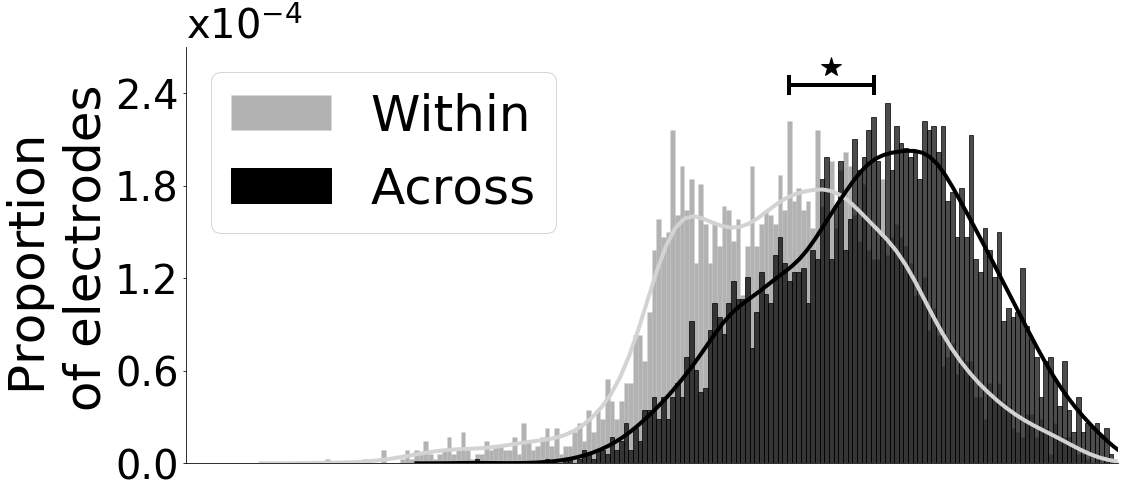

In [7]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
# plot.plot_2_histograms(e_corrs, 'within', 'across')
# plt.show()
plot.plot_2_histograms(e_corrs, 'within', 'across', xticks=False, outfile=outfile) 
plt.show()

In [8]:
pyfr_locs = plot.compile_df_locs(pyfr_across['R'])
corr_pyfr_locs = np.atleast_2d(pyfr_across['Correlation'])

In [10]:
from scipy import stats
grouped_results = e_corrs.groupby('Subject')['within', 'across'].mean()
t_stat_group = stats.ttest_rel(grouped_results['across'],grouped_results['within'])

In [11]:
t_stat_group

Ttest_relResult(statistic=9.642069641785788, pvalue=3.1928495263826334e-14)

In [12]:
grouped_results.shape

(67, 2)

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(pyfr_locs,  np.atleast_2d(corr_pyfr_locs), width=2, vox_size=2, outfile=outfile)

# RAM

In [13]:
W_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-a_exp.csv', index_col=0)
W_a_a.name = 'W_a_a'
W_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-all_exp.csv', index_col=0)
W_a_all.name = 'W_a_all'
W_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-w_exp.csv', index_col=0)
W_a_w.name = 'W_a_w'
W_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-a_exp.csv', index_col=0)
W_w_a.name = 'W_w_a'
W_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-all_exp.csv', index_col=0)
W_w_all.name = 'W_w_all'
W_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-w_exp.csv', index_col=0)
W_w_w.name = 'W_w_w'

In [14]:
dfs = [W_a_a, W_a_all, W_a_w, W_w_a, W_w_all, W_w_w]

In [15]:
RAM_df = dfs[0]
RAM_df = RAM_df.rename(columns={"Correlation":RAM_df.name})
for df_ in dfs[1:]:
    RAM_df = RAM_df.merge(df_, on=['Subject', 'R'])
    
    RAM_df = RAM_df.rename(columns={"Correlation":df_.name})

In [16]:
RAM_df.head()

,R,W_a_a,Subject,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w
0,[-50.39 18.22 -43.3 ],0.242494,R1083J_RAM_CatFR1_2,0.300987,0.447637,-0.162586,0.236228,0.061755
1,[-46.17 18.21 -42.23],0.177056,R1083J_RAM_CatFR1_1,0.046046,0.478972,0.165845,0.275166,0.292074
2,[-57.19 19.07 -44.75],0.234188,R1083J_RAM_CatFR1_4,0.788364,0.916196,0.542039,-0.021315,0.117429
3,[-43.21 18.21 -41.49],0.336156,R1083J_RAM_CatFR1_0,0.536711,0.796827,0.005241,-0.211179,0.046857
4,[-54.86 15.87 40.38],0.024989,R1032D_RAM_FR1_3,0.426785,0.232029,0.187670,0.312530,0.378536


In [17]:
RAM_df.dropna(inplace=True)

In [26]:
all_subject = np.array([])
all_within = np.array([])
all_across = np.array([])
all_R = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject = np.append(all_subject, item.split('_')[0])
    all_within = np.append(all_within, RAM_df['W_w_w'].iloc[i])
    all_across = np.append(all_across, RAM_df['W_a_w'].iloc[i])
    all_R = np.append(all_R, RAM_df['R'].iloc[i])

In [27]:
corr_all_df = pd.DataFrame()
corr_all_df['Subject'] = all_subject
corr_all_df['W_w_w'] = plot.r2z(all_within)
corr_all_df['W_a_w'] = plot.r2z(all_across)
corr_all_df['R'] = all_R

In [19]:
# corr_all_df = pd.DataFrame()
# corr_all_df['Subject'] = RAM_df['Subject']
# corr_all_df['W_w_w'] = plot.r2z(RAM_df['W_w_w'])
# corr_all_df['W_a_w'] = plot.r2z(RAM_df['W_a_w'])
# corr_all_df['R'] = RAM_df['R']

Ttest_relResult(statistic=6.931855267241709, pvalue=4.57248645964438e-07)


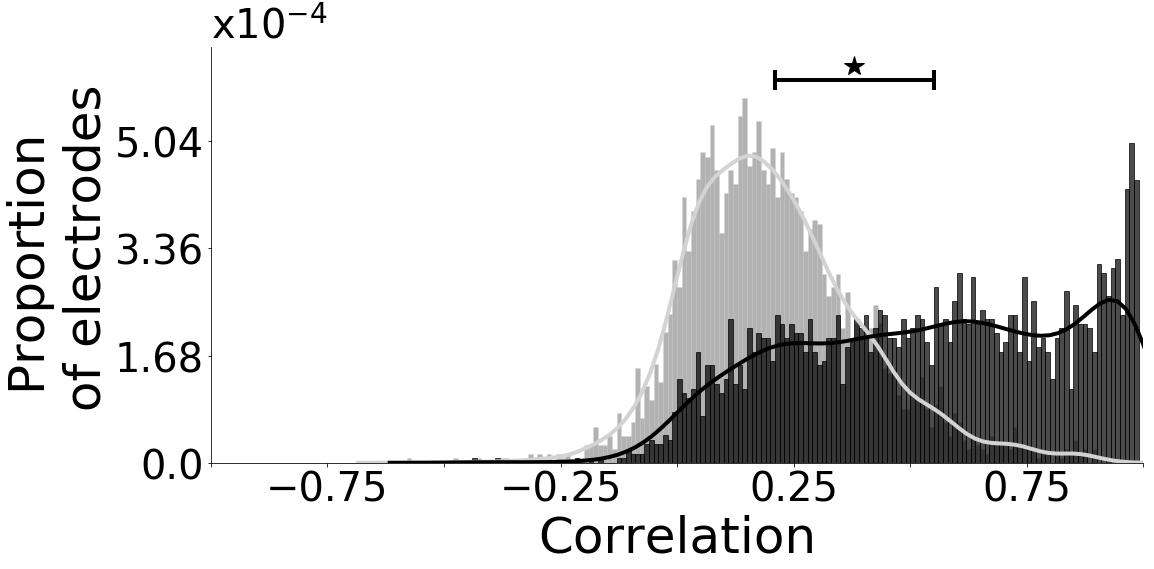

In [28]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

plt.show()
plot.plot_2_histograms(corr_all_df, 'W_w_w', 'W_a_w', legend=False, outfile=outfile) 

In [29]:
all_locs = plot.compile_df_locs(RAM_df['R'])
corr_all_locs = np.atleast_2d(RAM_df['W_a_w'])

In [30]:
from scipy import stats
grouped_results = corr_all_df.groupby('Subject')['W_w_w', 'W_a_w'].mean()
t_stat_group = stats.ttest_rel(grouped_results['W_a_w'],grouped_results['W_w_w'])

In [31]:
grouped_results

,W_w_w,W_a_w
Subject,,
R1032D,0.219335,0.824195
R1061T,0.086401,0.505154
R1075J,0.091786,1.185209
R1083J,0.089896,0.607879
R1092J,0.412031,1.435772
R1094T,0.183028,0.614582
R1106M,0.125466,0.534119
R1108J,0.183413,0.471260
R1111M,0.121263,0.452850


In [32]:
t_stat_group

Ttest_relResult(statistic=6.931855267241709, pvalue=4.57248645964438e-07)

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(all_locs,  np.atleast_2d(corr_all_locs), width=2, vox_size=2, outfile=outfile)

## FR

In [81]:
str_find = '_FR1_'
str_find
FR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [82]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [83]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    #print(item.split('_')[0])
    fr_subject = np.append(fr_subject, item.split('_')[0])
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [84]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

Ttest_relResult(statistic=6.229172514306857, pvalue=2.349274041631397e-06)


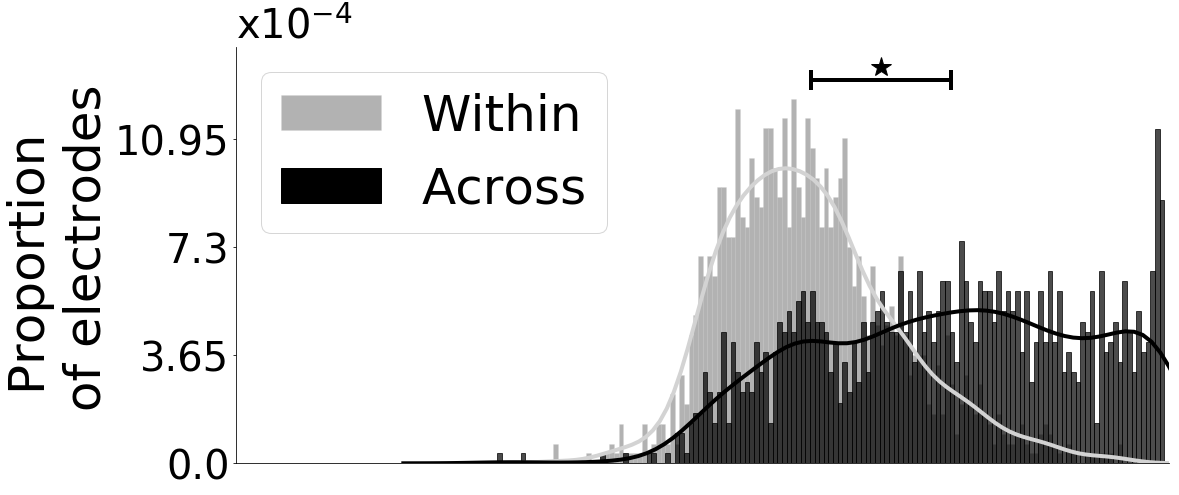

In [85]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

plt.show()
plot.plot_2_histograms(corr_fr_df, 'W_w_w', 'W_a_w', xticks=False, outfile=outfile) 

In [86]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

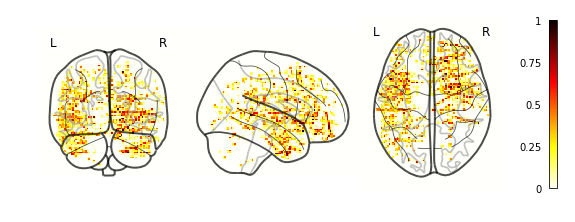

In [87]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(fr_locs, np.atleast_2d(fr_across), width=2, vox_size=2, outfile=outfile)

## CatFR

In [88]:
str_find = '_CatFR1_'
str_find
CatFR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [89]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject = np.append(catfr_subject, item.split('_')[0])
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [90]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

Ttest_relResult(statistic=6.620349989526637, pvalue=9.375936329967725e-07)


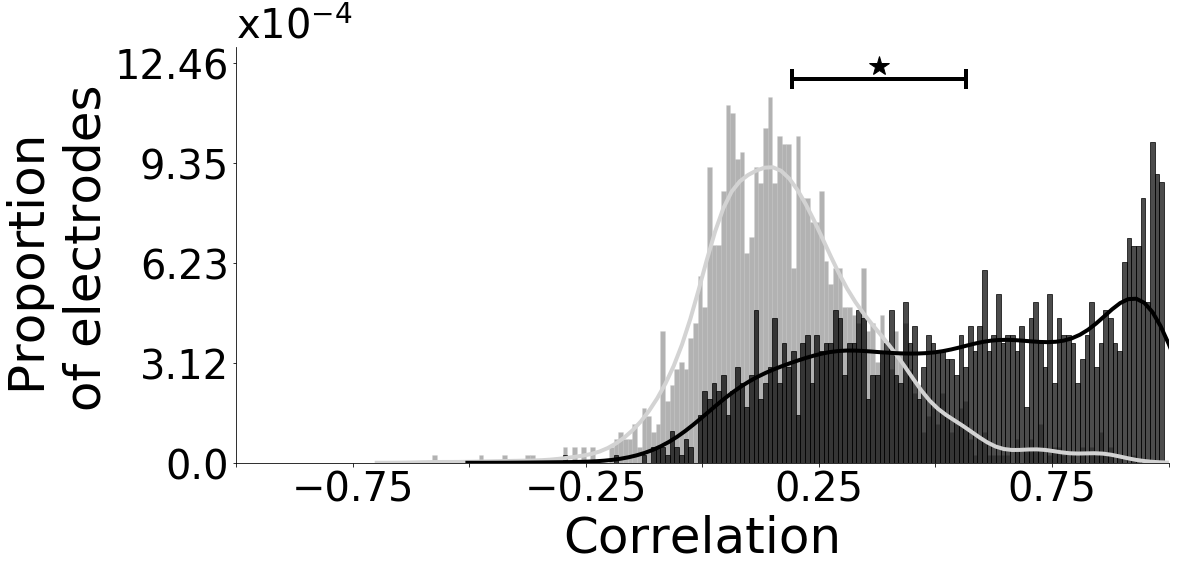

In [91]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

plt.show()
plot.plot_2_histograms(corr_catfr_df, 'W_w_w', 'W_a_w', legend=False, outfile=outfile) 

In [92]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

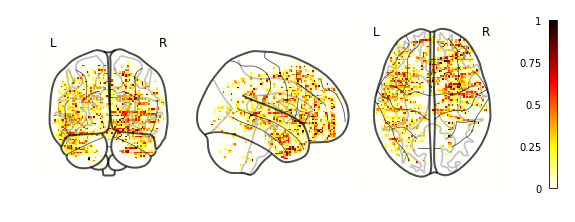

In [93]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(catfr_locs, np.atleast_2d(catfr_across), width=2, vox_size=2, outfile=outfile)

## Across

In [ ]:
A_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-a_exp.csv', index_col=0)
A_a_a.name = 'A_a_a'
A_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-all_exp.csv', index_col=0)
A_a_all.name = 'A_a_all'
A_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-w_exp.csv', index_col=0)
A_a_w.name = 'A_a_w'
A_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-a_exp.csv', index_col=0)
A_w_a.name = 'A_w_a'
A_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-all_exp.csv', index_col=0)
A_w_all.name = 'A_w_all'
A_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-w_exp.csv', index_col=0)
A_w_w.name = 'A_w_w'

In [ ]:
dfs_2 = [A_a_a, A_a_all, A_a_w, A_w_w]

In [ ]:
RAM_df_2 = dfs_2[0]
RAM_df_2 = RAM_df_2.rename(columns={"Correlation":RAM_df_2.name})
for df_ in dfs_2[1:]:
    RAM_df_2 = RAM_df_2.merge(df_, on=['Subject', 'R'])
    RAM_df_2 = RAM_df_2.rename(columns={"Correlation":df_.name})

In [ ]:
RAM_df_2.dropna(inplace=True)

In [ ]:
ram_subject = np.array([])
ram_within = np.array([])
ram_across = np.array([])
ram_R = np.array([])
for i , item in enumerate(RAM_df_2['Subject'].values):
    #print(item.split('_')[0])
    ram_subject = np.append(ram_subject, item.split('_')[0])
    ram_within = np.append(ram_within, RAM_df_2['A_w_w'].iloc[i])
    ram_across = np.append(ram_across, RAM_df_2['A_a_w'].iloc[i])
    ram_R = np.append(ram_R, RAM_df_2['R'].iloc[i])

In [ ]:
corr_ram_df = pd.DataFrame()
corr_ram_df['Subject'] = ram_subject
corr_ram_df['A_w_w'] = plot.r2z(ram_within)
corr_ram_df['A_a_w'] = plot.r2z(ram_across)
corr_ram_df['R'] = ram_R

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plt.show()
plot.plot_2_histograms(corr_ram_df, 'A_w_w', 'A_a_w', legend=False, outfile=outfile) 
# plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')


In [ ]:
ram_locs = plot.compile_df_locs(corr_ram_df['R'])

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(ram_locs, np.atleast_2d(ram_across), width=2, vox_size=2, outfile=outfile)